<a href="https://colab.research.google.com/github/Ziyangirova/VKR/blob/main/VKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-pastel')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

<ipython-input-15-f182074f356e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-pastel')


Загрузка датасетов

In [2]:
X_bp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/VKR/X_bp.xlsx', index_col=0)
X_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [3]:
X_bp.shape

(1023, 10)

In [4]:
X_nup = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/VKR/X_nup.xlsx', index_col=0)
X_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [5]:
X_nup.shape

(1040, 3)

Объединение датасетов

In [6]:
X_set = X_bp.join(X_nup, how='inner')
X_set.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

Анализ датасета

In [7]:
X_set.shape

(1023, 13)

In [8]:
X_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [9]:
#количество уникальных значений
X_set.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [10]:
#проверка на наличие дубликатов
X_set.duplicated().sum()

0

In [11]:
X_set.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

<Axes: >

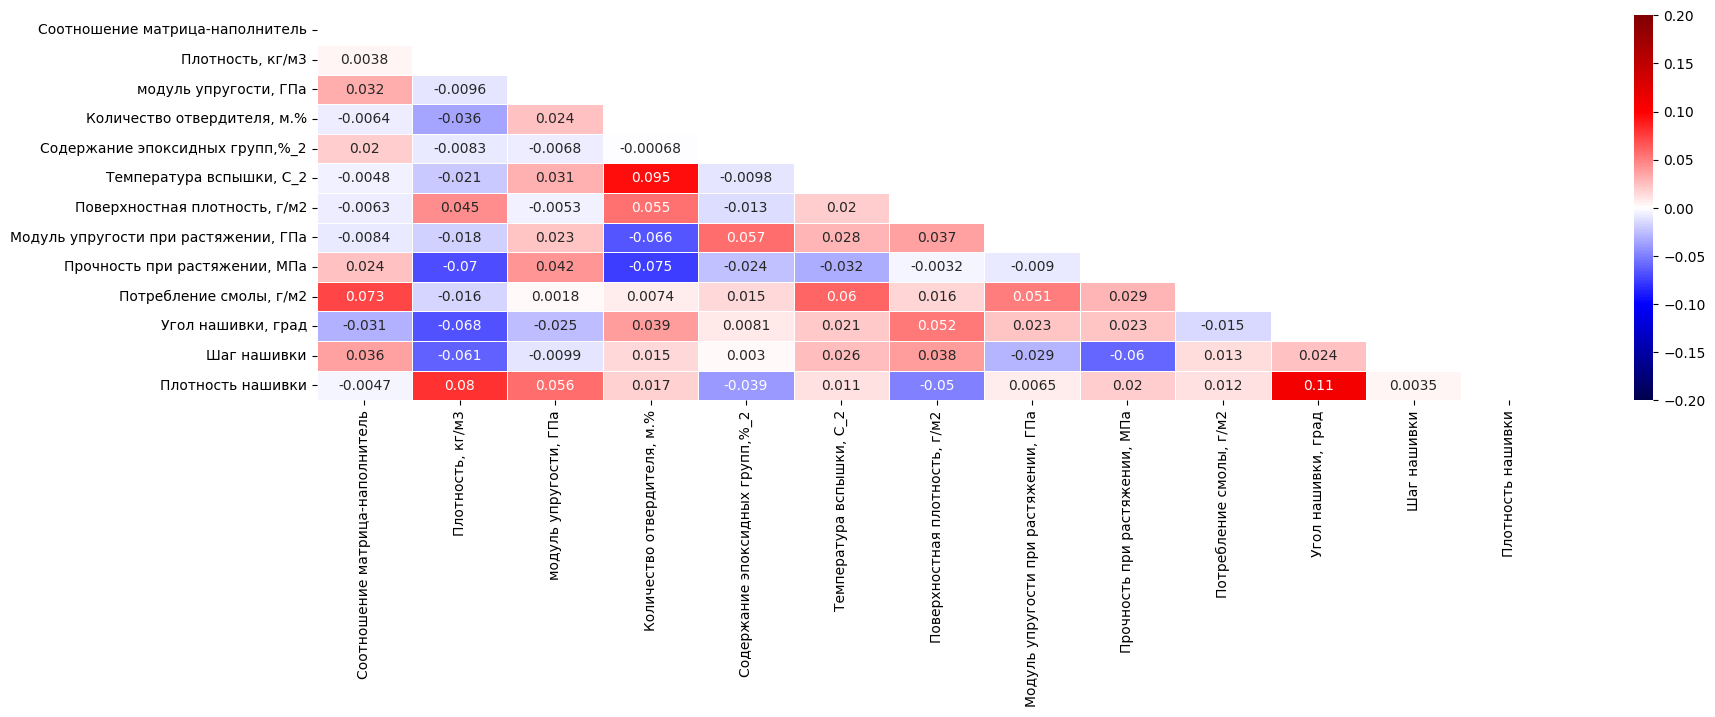

In [22]:
#тепловая карта
fig, ax = plt.subplots(figsize=(20, 5))
mask = np.triu(X_set.corr())
sns.heatmap(X_set.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

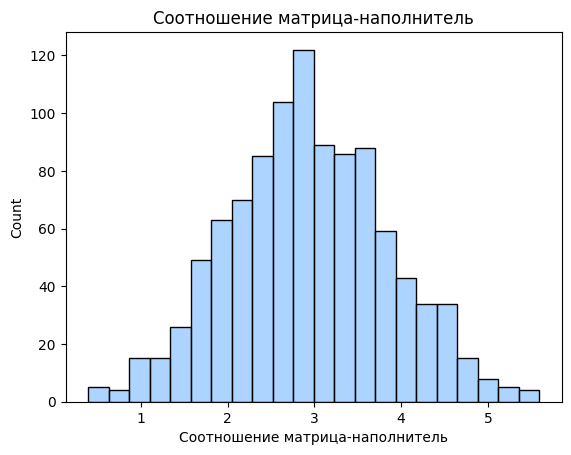

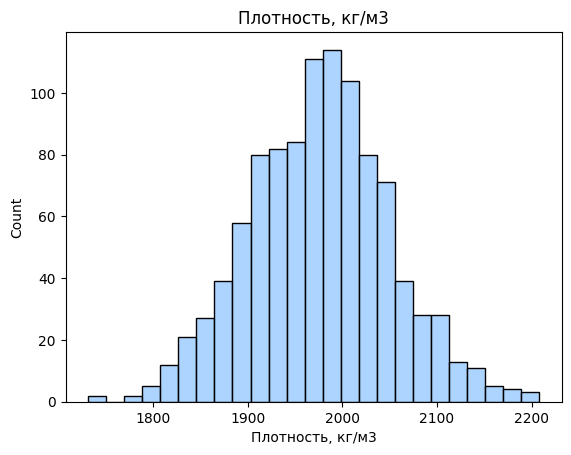

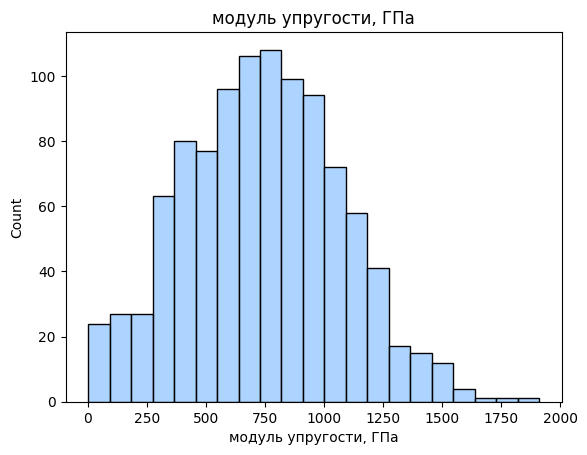

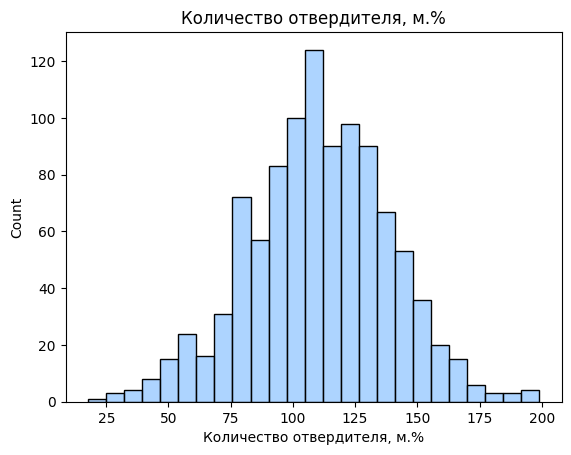

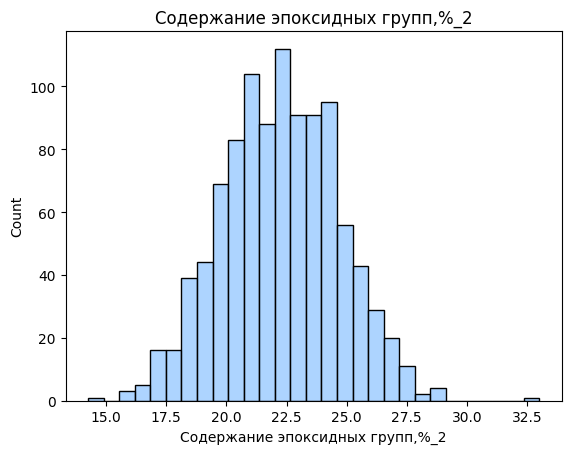

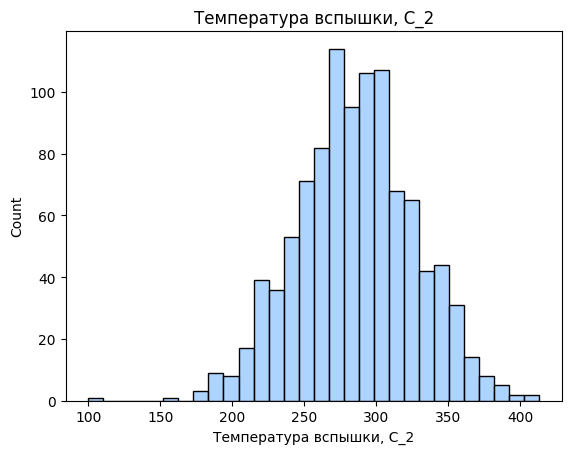

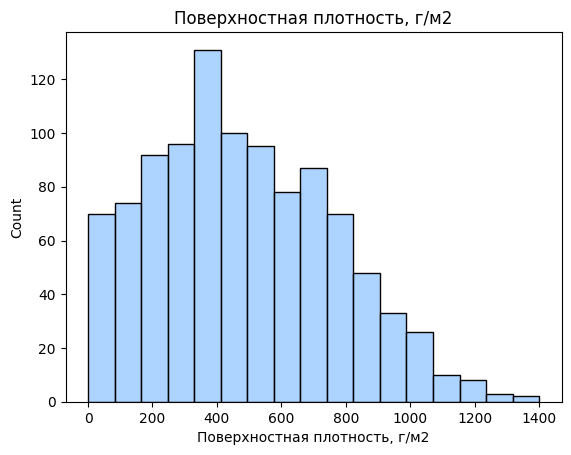

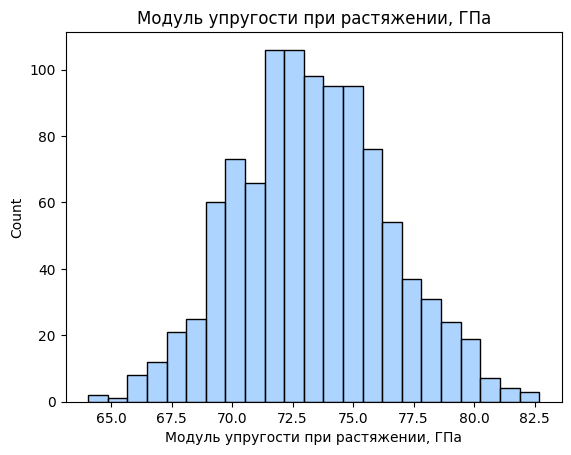

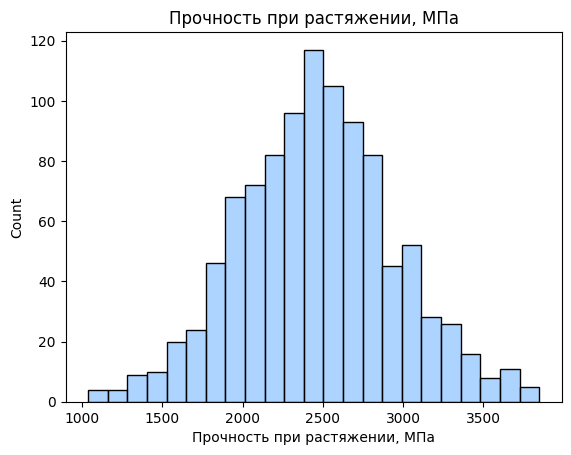

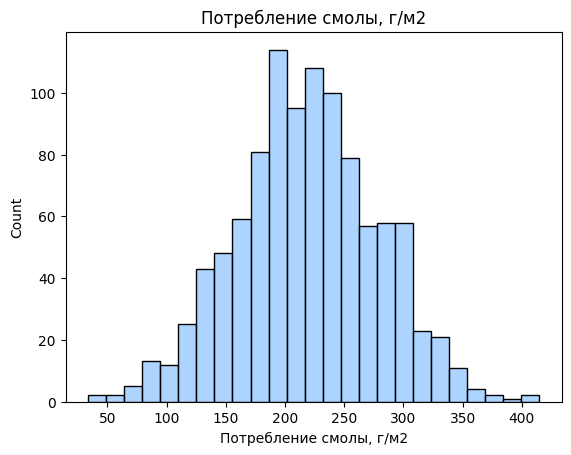

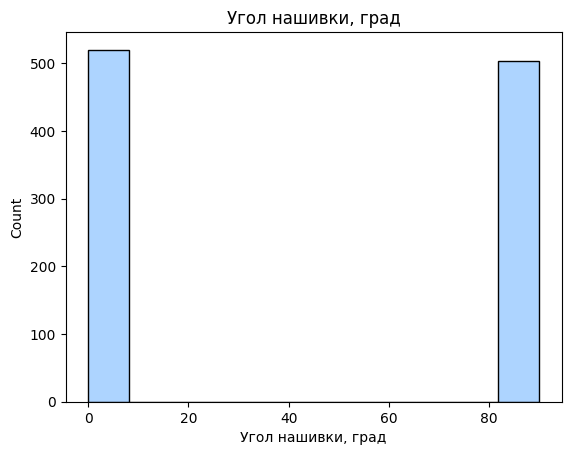

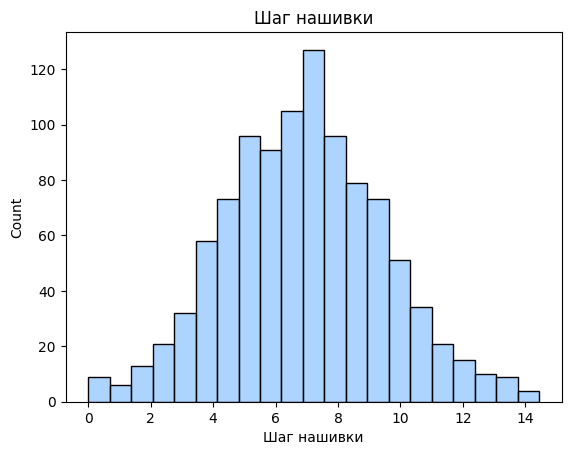

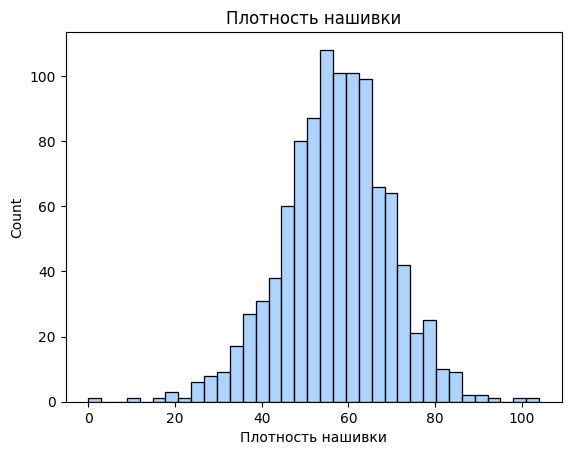

In [17]:
#распределения показателей в каждом столбце:
for column in X_set.columns:
	plt.figure()
	sns.histplot(X_set[column])
	plt.title(column)

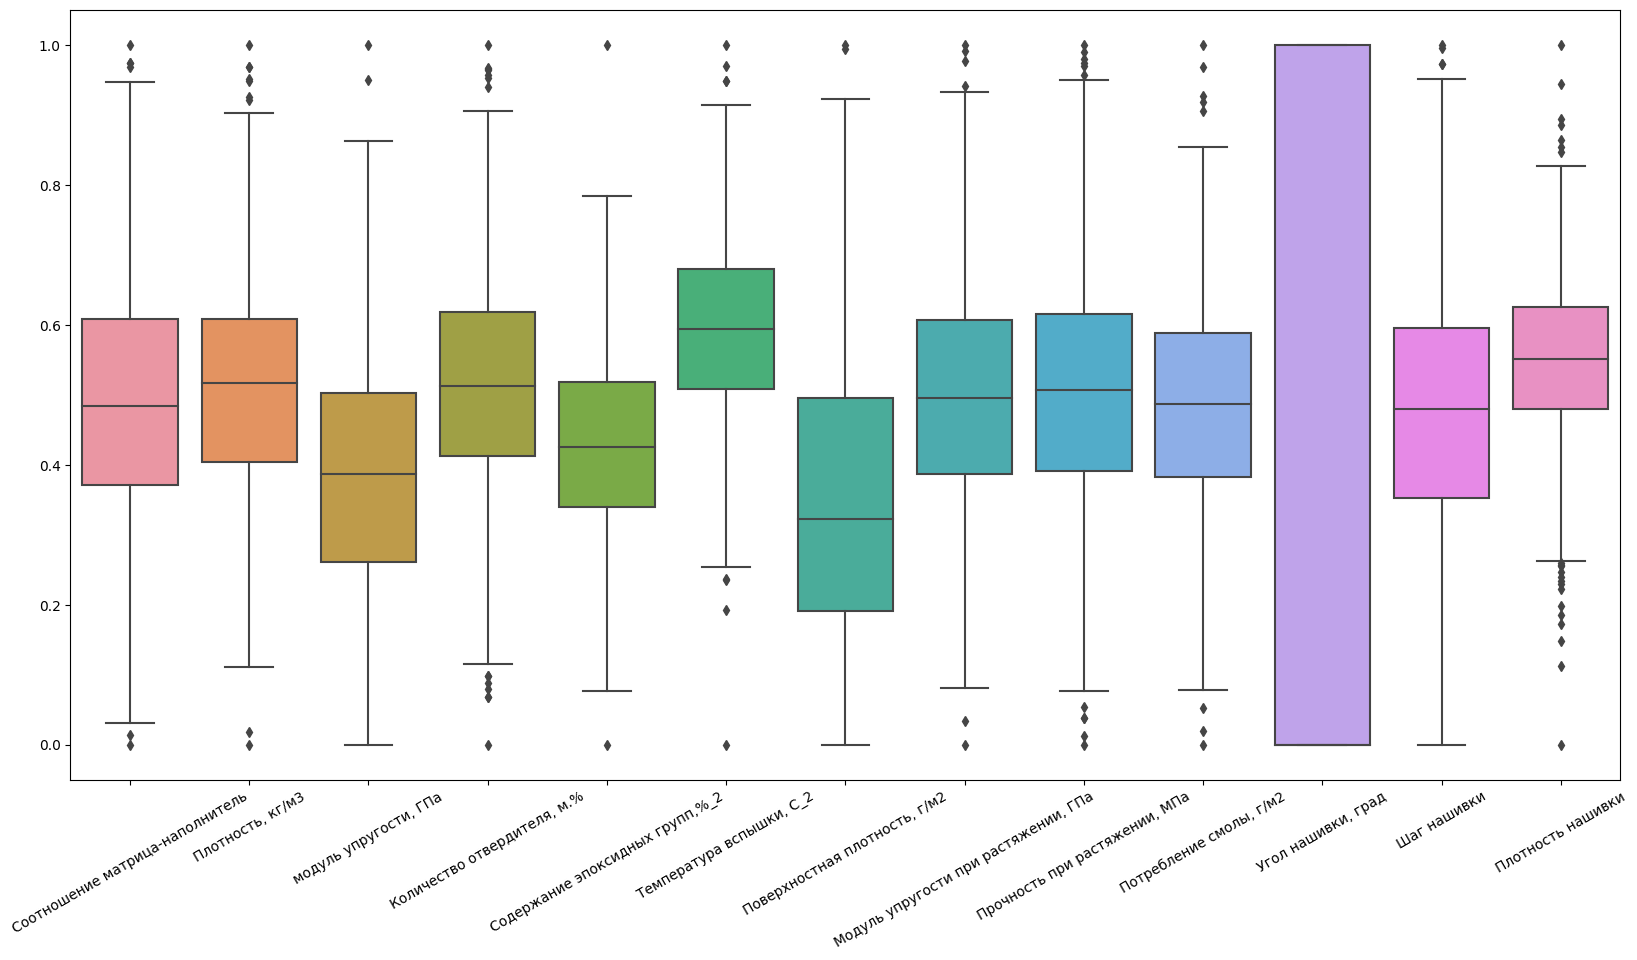

In [23]:
#boxplot
MinMaxScaler = preprocessing.MinMaxScaler()
X_set_for_visual = pd.DataFrame(MinMaxScaler.fit_transform(X_set), columns = X_set.columns) #датасет создан для удобной визуализации
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data = X_set_for_visual, orient='v', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

In [25]:
#создание переменной со списком всех параметров, в которых есть выбросы
X_set.columns
column_list_outliers = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [28]:
for i in column_list_outliers:
    Q3, Q1 = np.percentile(X_set.loc[:,i],[75, 25])
    IQR = Q3 - Q1
    max = Q3 + (1.5*IQR)
    min = Q1 - (1.5*IQR)
    X_set.loc[X_set[i] < min,i] = np.nan
    X_set.loc[X_set[i] > max,i] = np.nan

In [29]:
X_set1 = X_set

In [30]:
X_set_clean = X_set1.dropna(axis=0, how='any')

In [31]:
X_set_clean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [32]:
X_set_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    int64  
 11  Шаг нашивки       

In [33]:
X_set_clean.shape

(936, 13)

<Axes: >

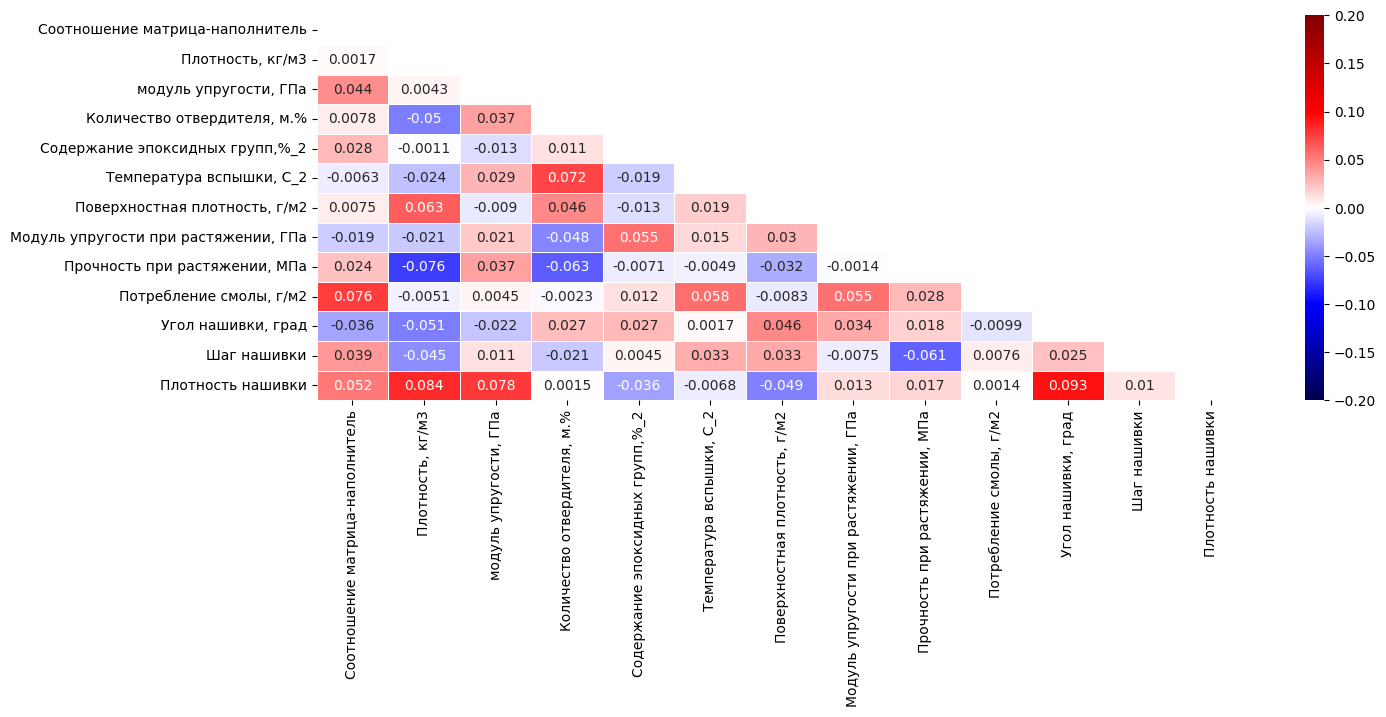

In [36]:
#определение зависимостей после удаления выбросов
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(X_set_clean.corr())
sns.heatmap(X_set_clean.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

Наиболее выраженные зависимости:

*   Модуль упругости при растяжении, Гпа: Количество отвердителя, м.%; Содержание эпоксидных групп,%_2; Потребление смолы, г/м2

*  Прочность при растяжении.МПа: Плотность, кг/м3; Количество отвердителя, м.%; Шаг нашивки; модуль упругости, ГПа +(Поверхностная плотность, г/м2)

*   Соотношение матрица-наполнитель: Потребление смолы, г/м2, Плотность нашивки, модуль упругости, ГПа


In [37]:
X_set_mean = X_set.fillna(X_set.mean())

In [38]:
X_set_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [39]:
X_set_mean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                   110.558048                        22.267857   
1                    50.000000                        23.750000   
2                    49.900000                        22.241680   
3                   129.000000                        21.250000   
4                   111.860000                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                285.949508                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

<Axes: >

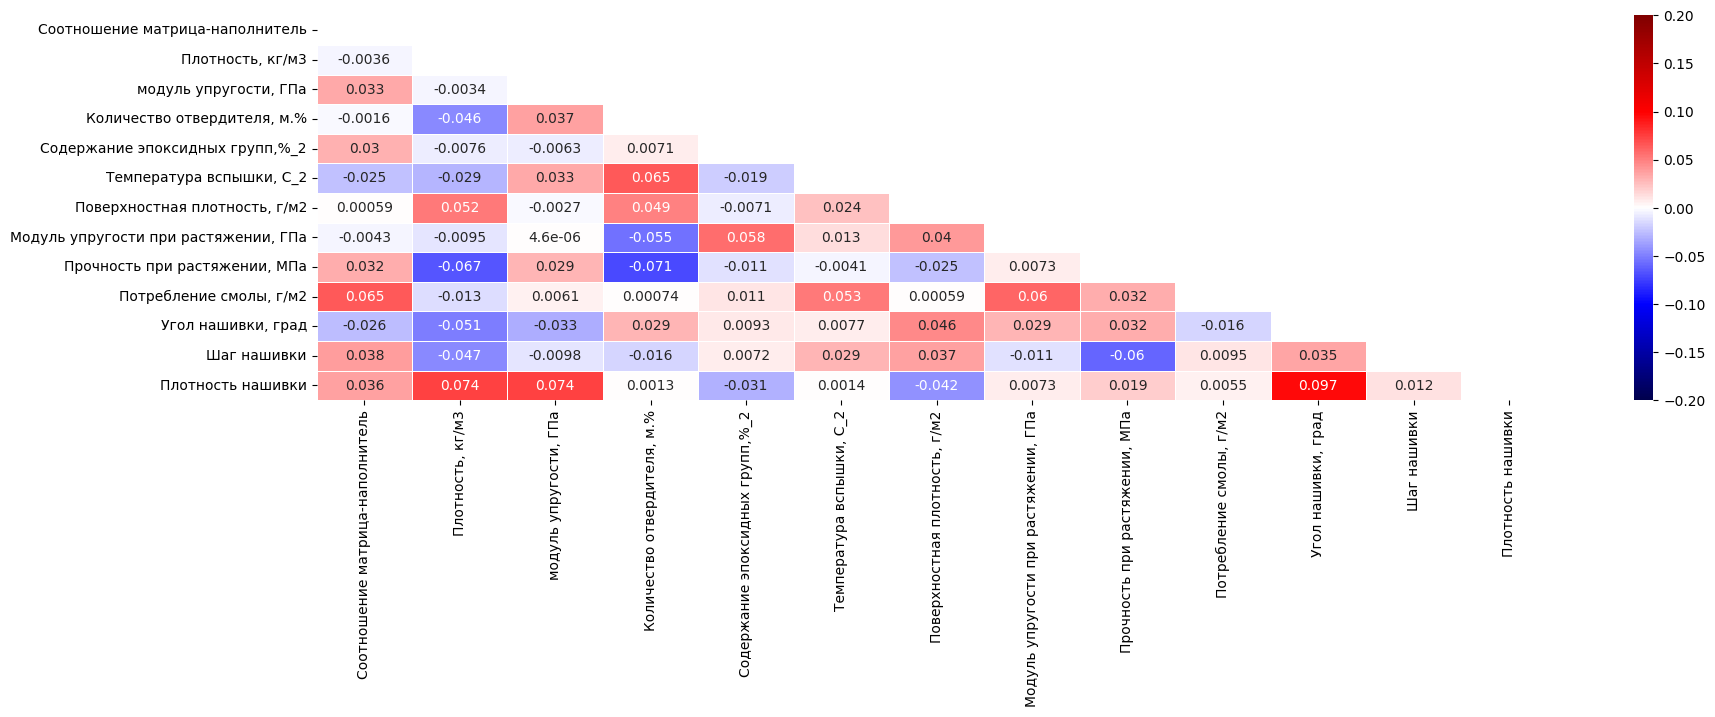

In [45]:
fig, ax = plt.subplots(figsize=(20, 5))
mask = np.triu(X_set_mean.corr())
sns.heatmap(X_set_mean.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

In [46]:
#Дальнейшую работу проводим с датасетом, в котором выбросы заменены на значения mean
df = X_set_mean
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                   110.558048                        22.267857   
1                    50.000000                        23.750000   
2                    49.900000                        22.241680   
3                   129.000000                        21.250000   
4                   111.860000                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                285.949508                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

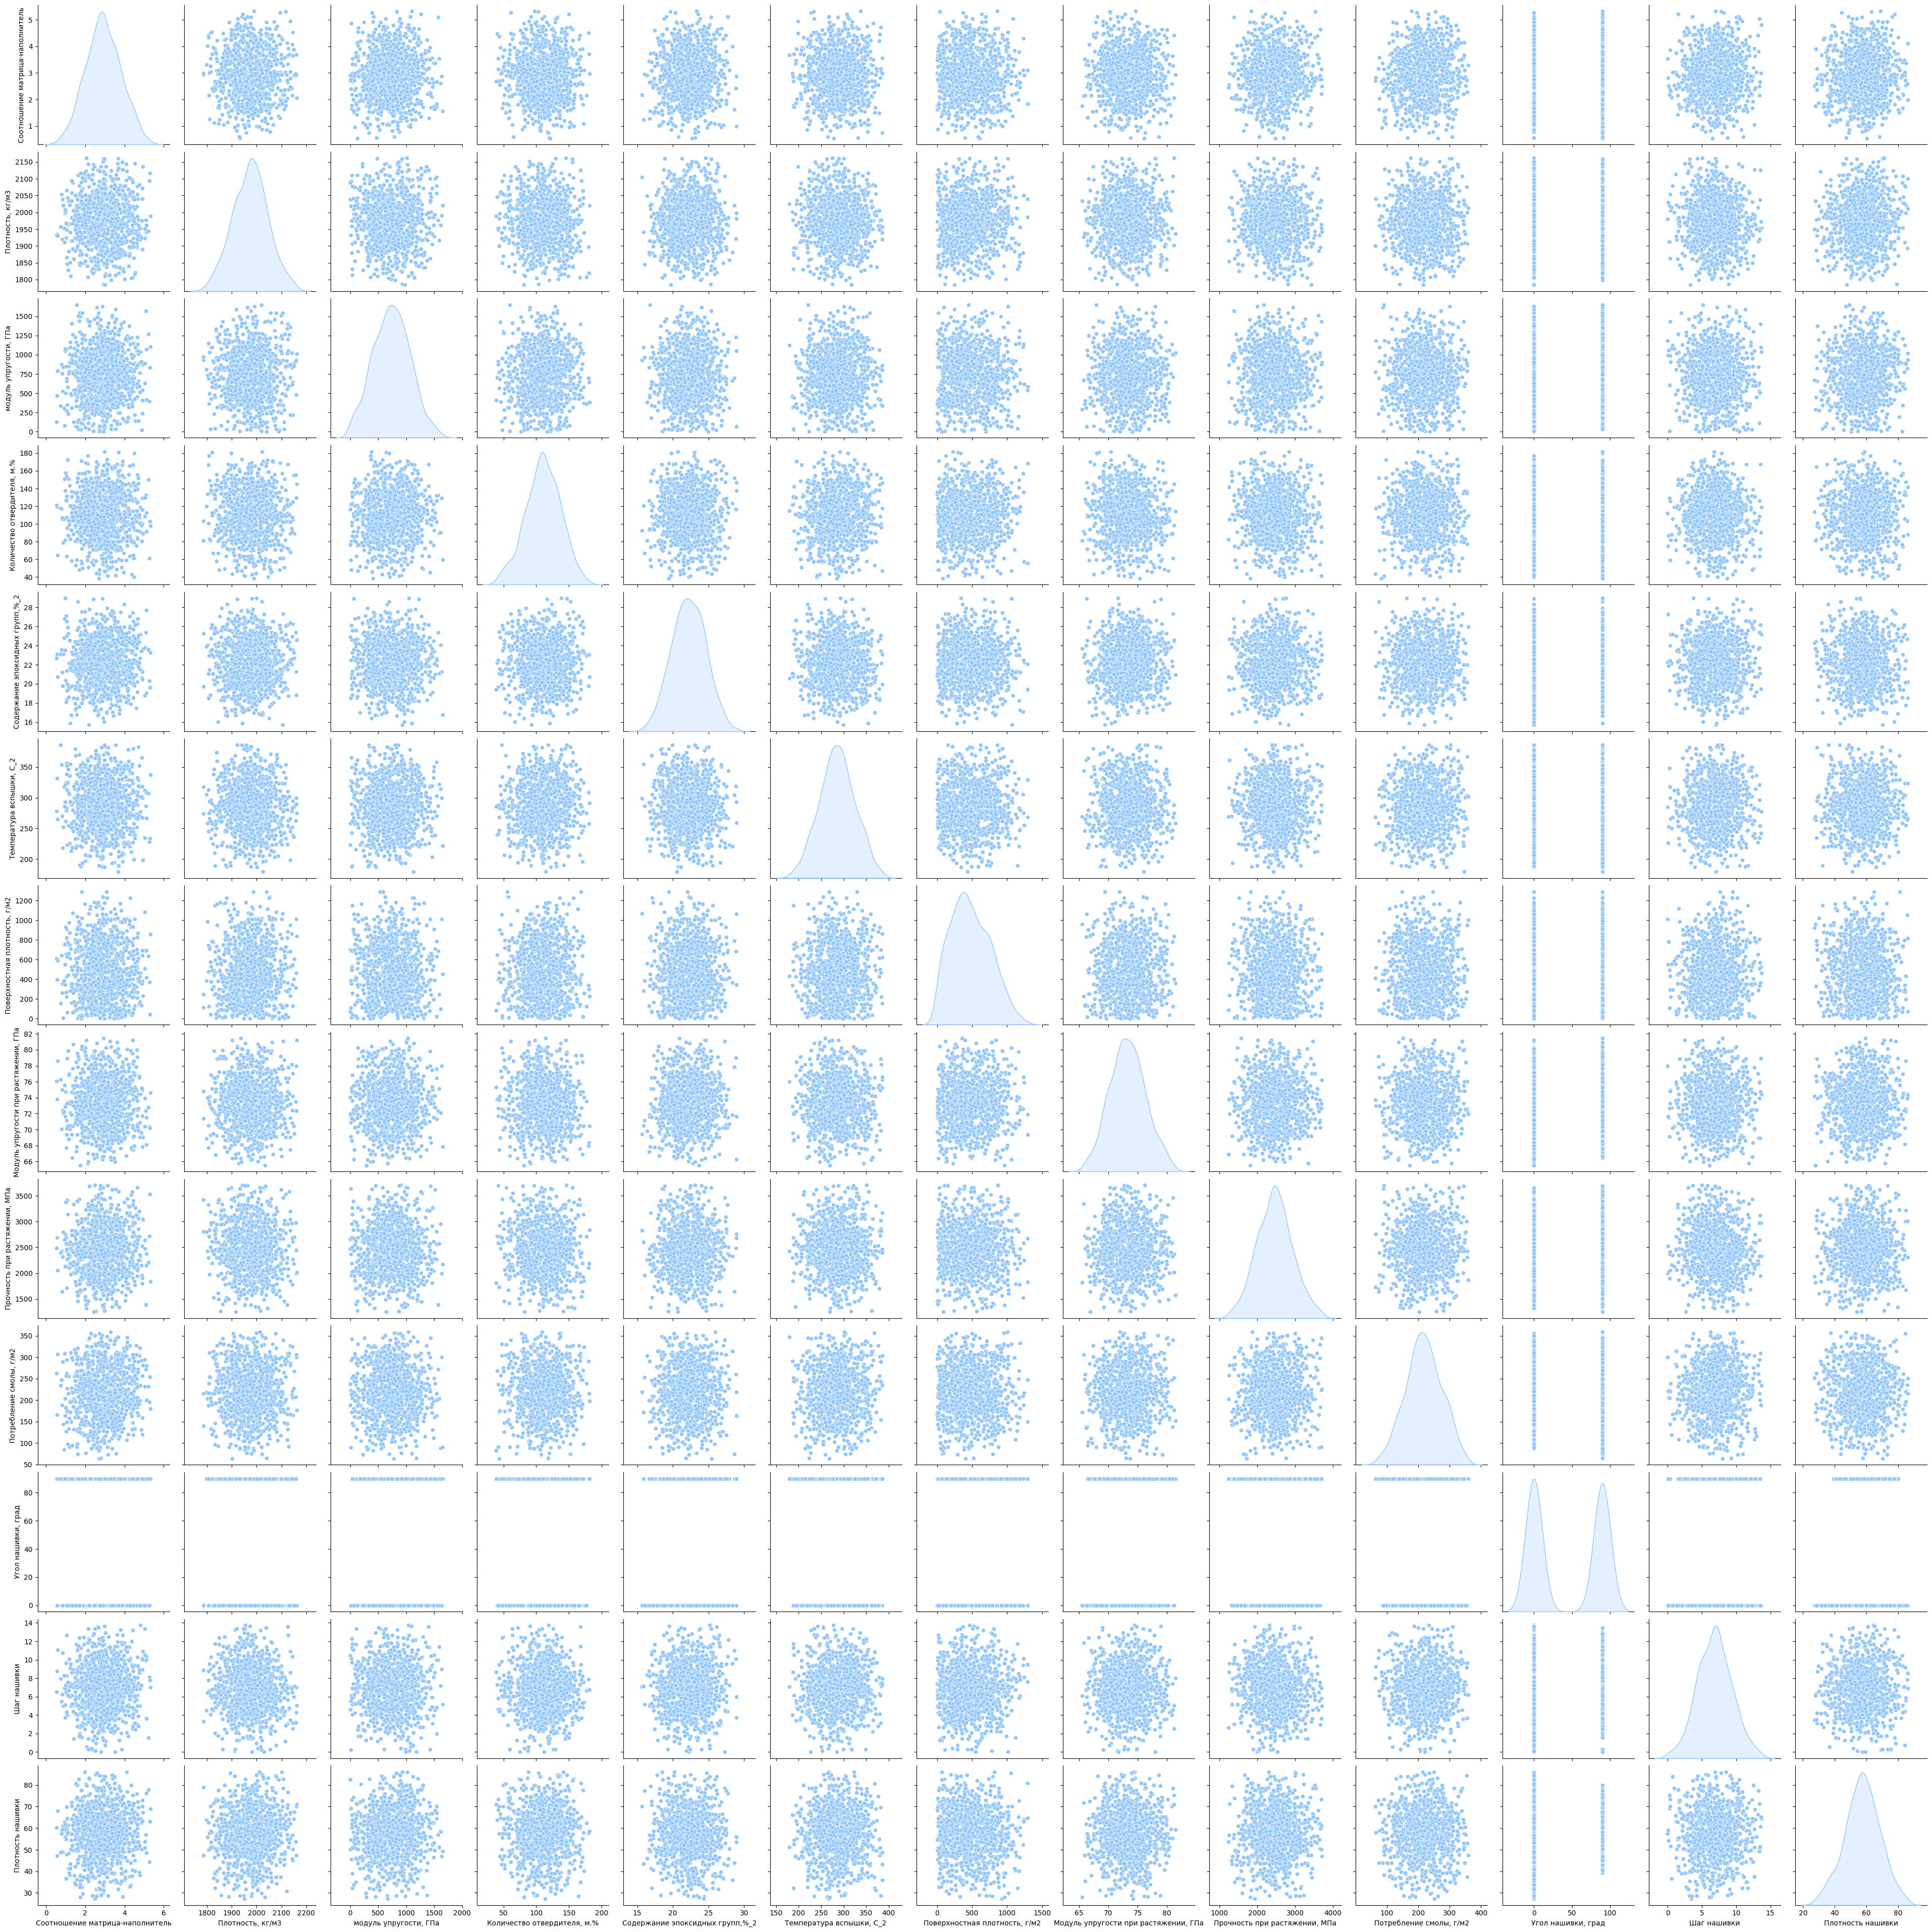

In [47]:
ax = sns.pairplot(df, diag_kind="kde", height = 3)

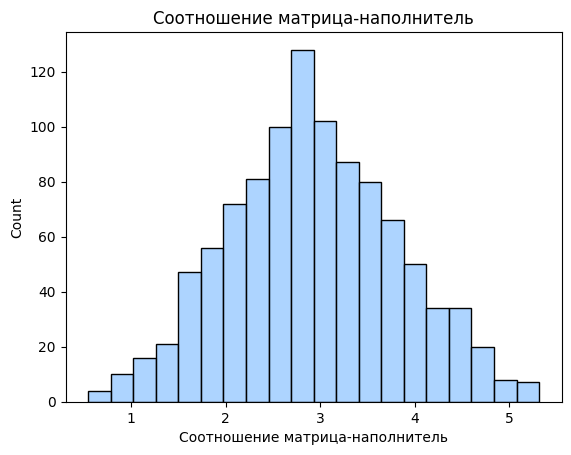

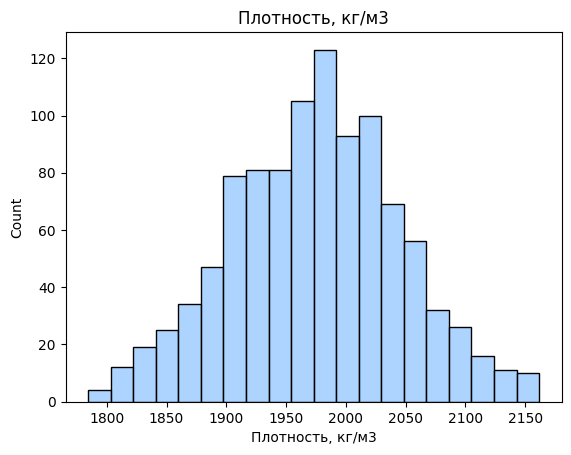

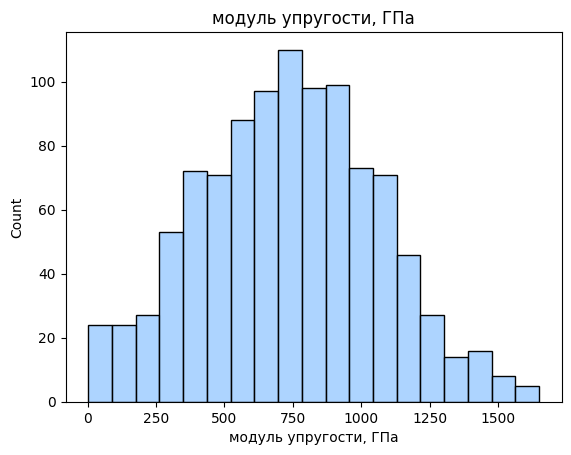

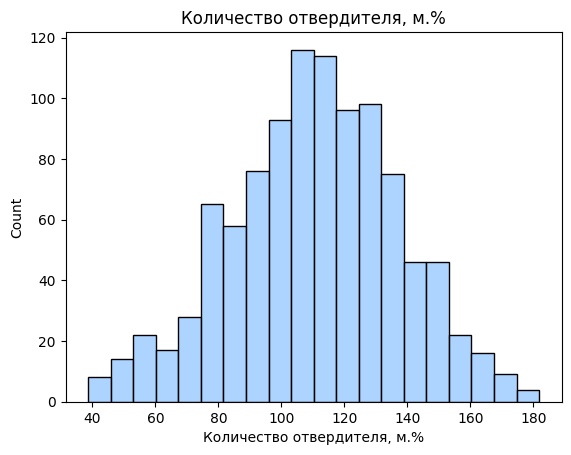

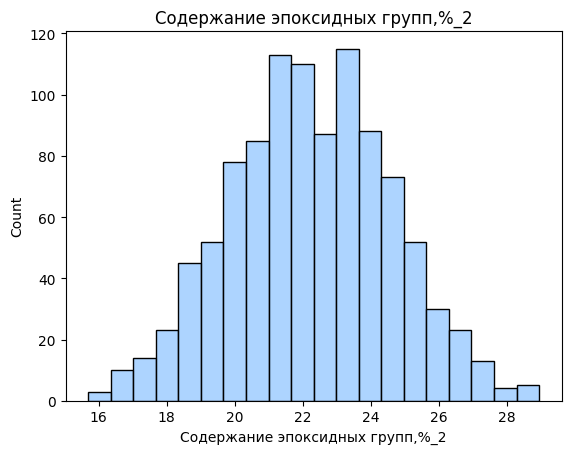

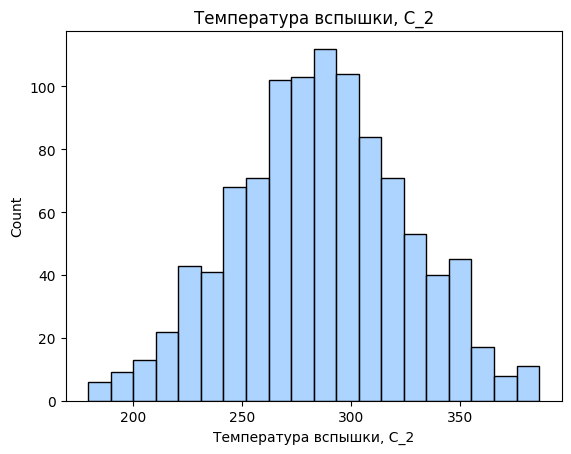

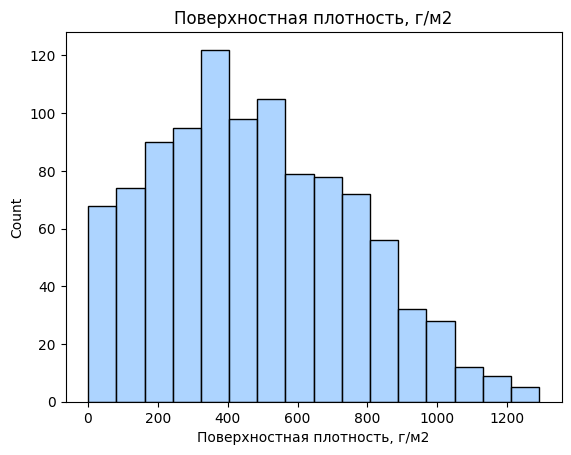

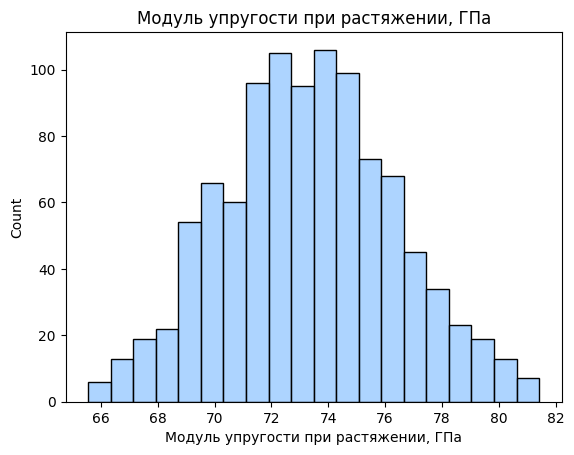

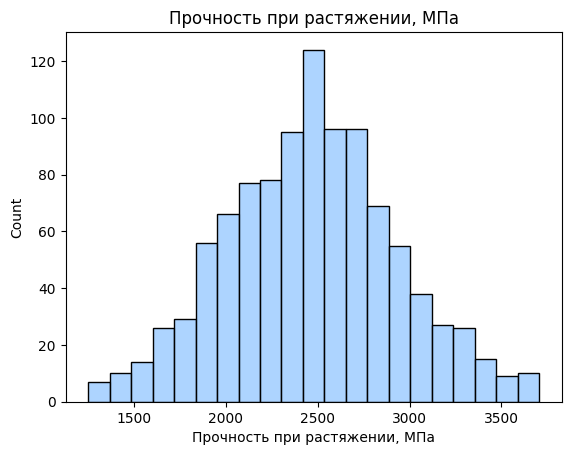

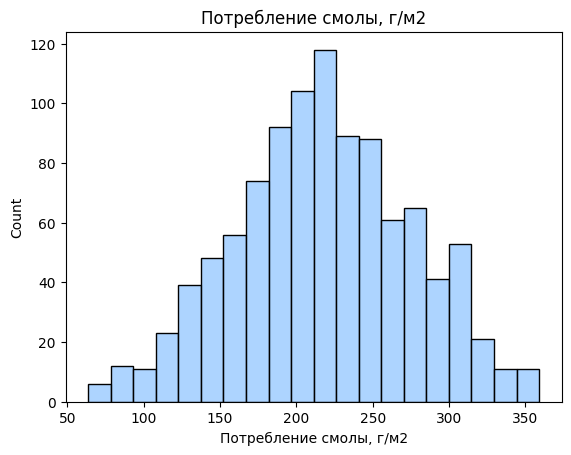

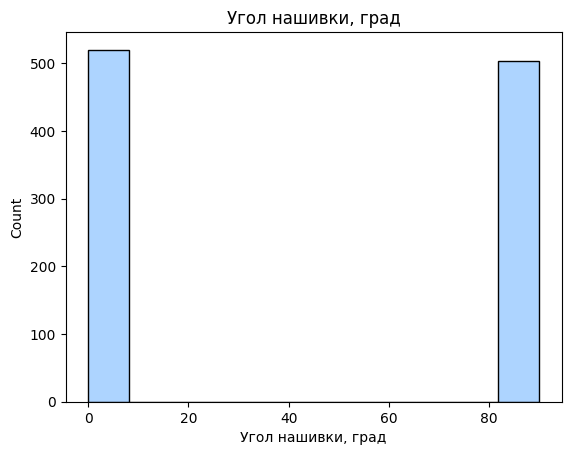

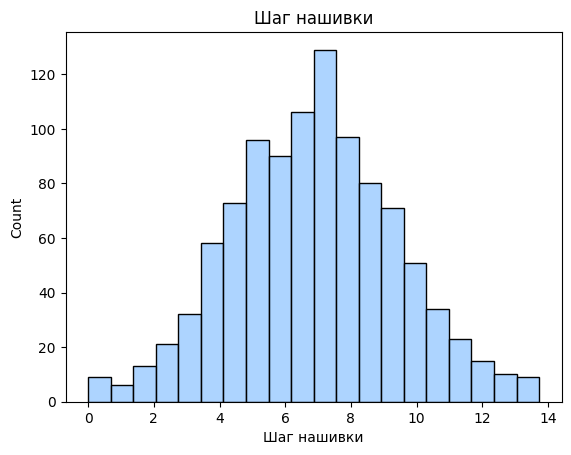

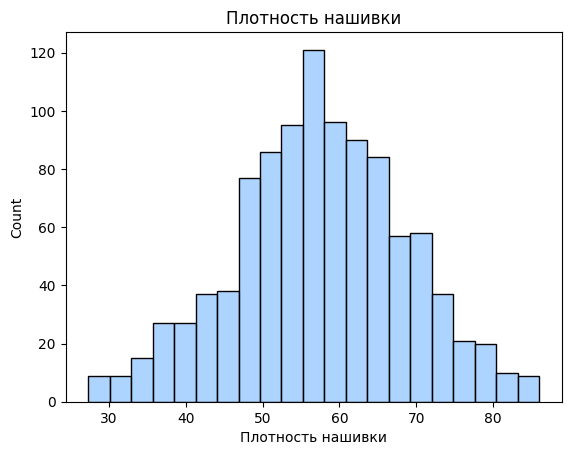

In [48]:
for column in df.columns:
	plt.figure()
	sns.histplot(df[column])
	plt.title(column)

In [44]:
#MinMaxScaler
scaler = preprocessing.MinMaxScaler()
col = df.columns
result = scaler.fit_transform(df)
df_minmax = pd.DataFrame(result, columns = col)
df_minmax.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          0.498844          0.504592   
std                           0.187191          0.187870   
min                           0.000000          0.000000   
25%                           0.372092          0.371411   
50%                           0.495399          0.510844   
75%                           0.629650          0.626245   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean                0.446445                     0.502162   
std                 0.198214                     0.186237   
min                 0.000000                     0.000000   
25%                 0.302135                     0.378699   
50%                 0.447061                     0.502162   
75%                 0.579819                     0.632613   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                          0.493679                  0.515619   
std                           0.178708                  0.190405   
min                           0.000000                  0.000000   
25%                           0.371013                  0.387036   
50%                           0.492857                  0.515619   
75%                           0.623384                  0.644492   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                        0.372145                              0.489020   
std                         0.215689                              0.191799   
min                         0.000000                              0.000000   
25%                         0.206249                              0.361445   
50%                         0.349615                              0.487331   
75%                         0.535487                              0.615795   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                        0.495005                 0.522725   
std                         0.189583                 0.195289   
min                         0.000000                 0.000000   
25%                         0.364888                 0.393568   
50%                         0.493717                 0.523036   
75%                         0.613140                 0.653680   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean             0.491691     0.500310           0.513109  
std              0.500175     0.183651           0.189698  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.369930           0.391631  
50%              0.000000     0.502022           0.513109  
75%              1.000000     0.624505           0.635267  
max              1.000000     1.000000           1.000000

**1.Определение значения Модуля Упругости при растяжении, ГПа**

Наиболее выраженные зависимости с Модулем упругости при растяжении, Гпа у показателей: 

*   Количество отвердителя, м.%;
*   Содержание эпоксидных групп,%_2;
*   Потребление смолы, г/м2

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [115]:
inputs_1 = ['Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']
output_1 = ['Модуль упругости при растяжении, ГПа']

X_1 = df[inputs_1]
y_1 = df[output_1]

In [120]:
y = y_1
X = X_1
models_predictions = pd.DataFrame()
models_statistics = pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

# Linear model
linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train, y_train)
predictions = linear_regr.predict(X_test)
models_predictions['Linear Model']=predictions.flatten()
models_statistics.loc['Linear Model','R2'] = linear_regr.score(X_test,y_test)
models_statistics.loc['Linear Model','RMSE'] = np.sqrt(mean_squared_error(y_test, predictions))
models_statistics.loc['Linear Model','MAE'] = mean_absolute_error(y_test, predictions)
models_statistics.loc['Linear Model','MAPE'] = mean_absolute_percentage_error(y_test, predictions)

# Lasso
Lasso_regr = linear_model.Lasso()
Lasso_regr.fit(X_train, y_train)
predictions = Lasso_regr.predict(X_test)
models_predictions['Lasso Model']=predictions.flatten()
models_statistics.loc['Lasso Model','R2'] = Lasso_regr.score(X_test,y_test)
models_statistics.loc['Lasso Model','RMSE'] = np.sqrt(mean_squared_error(y_test, predictions))
models_statistics.loc['Lasso Model','MAE'] = mean_absolute_error(y_test, predictions)
models_statistics.loc['Lasso Model','MAPE'] = mean_absolute_percentage_error(y_test, predictions)

# K Neighbours
KNeighbours_regr = KNeighborsRegressor()
KNeighbours_regr.fit(X_train, y_train)
predictions = KNeighbours_regr.predict(X_test)
models_predictions['KNeighbours Model']=predictions.flatten()
models_statistics.loc['KNeighbours Model','R2'] = KNeighbours_regr.score(X_test,y_test)
models_statistics.loc['KNeighbours Model','RMSE'] = np.sqrt(mean_squared_error(y_test, predictions))
models_statistics.loc['KNeighbours Model','MAE'] = mean_absolute_error(y_test, predictions)
models_statistics.loc['KNeighbours Model','MAPE'] = mean_absolute_percentage_error(y_test, predictions)

# Random Forest
RF_regr = RandomForestRegressor()
RF_regr.fit(X_train, y_train)
predictions = RF_regr.predict(X_test)
models_predictions['Random Forest Model']=predictions.flatten()
models_statistics.loc['Random Forest Model','R2'] = RF_regr.score(X_test,y_test)
models_statistics.loc['Random Forest Model','RMSE'] = np.sqrt(mean_squared_error(y_test, predictions))
models_statistics.loc['Random Forest Model','MAE'] = mean_absolute_error(y_test, predictions)
models_statistics.loc['Random Forest Model','MAPE'] = mean_absolute_percentage_error(y_test, predictions)

Dummy_regr = DummyRegressor()
Dummy_regr.fit(X_train, y_train)
predictions = Dummy_regr.predict(X_test)
models_predictions['Base Model']=predictions.flatten()
models_statistics.loc['Base Model','R2'] = Dummy_regr.score(X_test,y_test)
models_statistics.loc['Base Model','RMSE'] = np.sqrt(mean_squared_error(y_test, predictions))
models_statistics.loc['Base Model','MAE'] = mean_absolute_error(y_test, predictions)
models_statistics.loc['Base Model','MAPE'] = mean_absolute_percentage_error(y_test, predictions)
models_statistics

<ipython-input-120-68d280efedf7>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_regr.fit(X_train, y_train)


R2      RMSE       MAE      MAPE
Linear Model         0.004767  2.970698  2.398410  0.032806
Lasso Model          0.004666  2.970849  2.398748  0.032812
KNeighbours Model   -0.201105  3.263523  2.630746  0.035945
Random Forest Model -0.176696  3.230191  2.617157  0.035820
Base Model          -0.000027  2.977844  2.402075  0.032865

In [117]:
Linear_model = LinearRegression()

In [ ]:
ShowTime = pd.DataFrame()
ShowTime['0'] = y_test.to_numpy().flatten()
ShowTime['Linear'] = models_predictions['Linear Model'].to_numpy().flatten()
ShowTime['Lasso'] = models_predictions['Lasso Model'].to_numpy().flatten()
ShowTime['K Neighbours'] = models_predictions['KNeighbours Model'].to_numpy().flatten()
ShowTime['Random Forest'] = models_predictions['Random Forest Model'].to_numpy().flatten()
ShowTime['Base'] = models_predictions['Base Model'].to_numpy().flatten()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


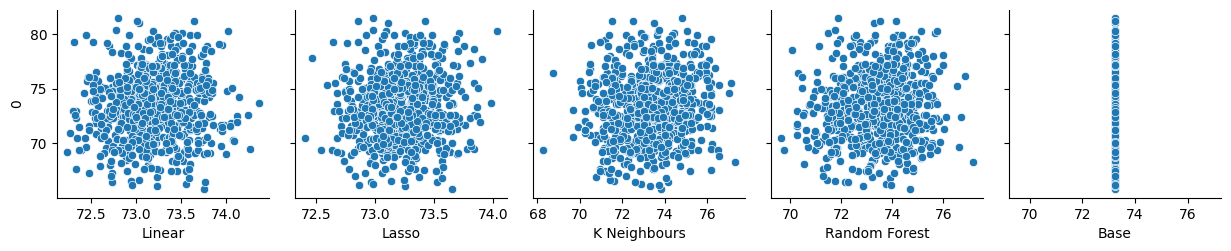

In [ ]:
ax = sns.pairplot(data=ShowTime, x_vars=['Linear', 'Lasso', 'K Neighbours', 'Random Forest', 'Base'], y_vars=['0'], palette='Reds')